In [1]:
import os

#function to set python working dir to project's root dir
def set_working_dir():
    chdir_split = os.getcwd().split("/")
    if chdir_split[-1] == "notebooks":
        os.chdir("/".join(chdir_split[0:-1]))
        print(f"Current working dir: {os.getcwd()}")
        
set_working_dir()

Current working dir: /home/tales/ds/league_results_covid


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from src.dao import dao_football_data_co_uk as dao_fd
from src.processing import season_matches as sm
from src.utils import pretties

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
RAW_DATA_COLS = ['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 
                 'HTHG', 'HTAG', 'HTR']

In [5]:
country = "spain"
season_names = ['09/10', '10/11', '11/12', '12/13', '13/14', 
                '14/15', '15/16', '16/17', '17/18', '18/19', 
                '20/21']
# seasons = {}
season_tables = {}

# Loading data and processing data...
Turning all matches data into a summarized season data for each team.

In [6]:
for season_name in season_names:
    season_init = season_name.split("/")[0]
    season_end = season_name.split("/")[1]
    
    season_data = dao_fd.load_league_data((season_init, season_end), country)[RAW_DATA_COLS]
    season_matches = sm.matches_points(season_data)
    season_tables[season_name] = sm.season_table(season_matches)

In [7]:
all_seasons_table = pd.DataFrame()

for season_name in season_names:
    season_table = season_tables[season_name]
    all_seasons_table = all_seasons_table.append(season_table)

# Data Exploration

In [8]:
def plot_stat_evolution(seasons_table, stats, positions):
    
    for field in fields:
        pretties.display_md(f"### {field}")
        use_seasons_table = all_seasons_table[all_seasons_table["pos"].isin(positions)]
        use_seasons_table.groupby("season")[field].mean().plot(title=f"{field} mean", figsize=(10,3), style='.-');
        display(use_seasons_table.groupby("season")[field].mean())
        plt.pause(0.1)

### away_pts_percent

season
09/10    0.389772
10/11    0.426154
11/12    0.383861
12/13    0.408153
13/14    0.423207
14/15    0.431200
15/16    0.429973
16/17    0.443363
17/18    0.445629
18/19    0.408180
20/21    0.474208
Name: away_pts_percent, dtype: float64

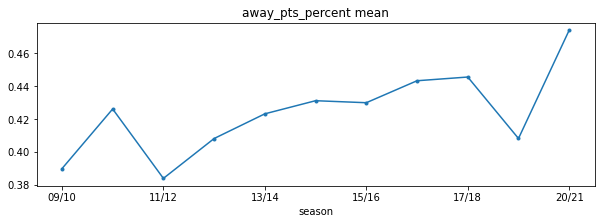

### away_pts

season
09/10    31.200000
10/11    30.714286
11/12    29.400000
12/13    32.200000
13/14    33.800000
14/15    36.200000
15/16    34.400000
16/17    35.800000
17/18    34.200000
18/19    28.000000
20/21    33.600000
Name: away_pts, dtype: float64

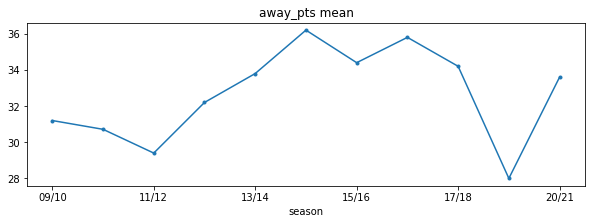

### away_goals_percent

season
09/10    0.406861
10/11    0.443426
11/12    0.355155
12/13    0.388591
13/14    0.380359
14/15    0.421051
15/16    0.409451
16/17    0.446760
17/18    0.441011
18/19    0.443437
20/21    0.456608
Name: away_goals_percent, dtype: float64

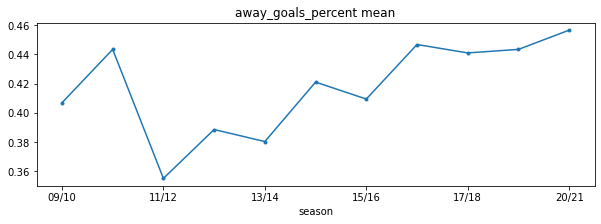

### away_goals

season
09/10    31.400000
10/11    31.714286
11/12    29.400000
12/13    33.000000
13/14    31.600000
14/15    37.000000
15/16    31.200000
16/17    38.200000
17/18    33.000000
18/19    27.166667
20/21    27.800000
Name: away_goals, dtype: float64

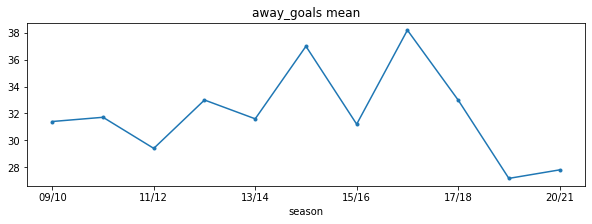

### home_pts_percent

season
09/10    0.610228
10/11    0.573846
11/12    0.616139
12/13    0.591847
13/14    0.576793
14/15    0.568800
15/16    0.570027
16/17    0.556637
17/18    0.554371
18/19    0.591820
20/21    0.525792
Name: home_pts_percent, dtype: float64

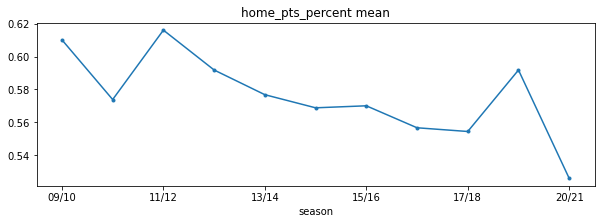

### home_pts

season
09/10    47.000000
10/11    40.000000
11/12    43.800000
12/13    46.200000
13/14    45.600000
14/15    47.200000
15/16    44.600000
16/17    44.200000
17/18    42.200000
18/19    40.333333
20/21    37.200000
Name: home_pts, dtype: float64

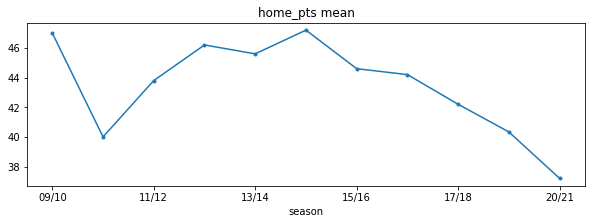

### home_goals_percent

season
09/10    0.593139
10/11    0.556574
11/12    0.644845
12/13    0.611409
13/14    0.619641
14/15    0.578949
15/16    0.590549
16/17    0.553240
17/18    0.558989
18/19    0.556563
20/21    0.543392
Name: home_goals_percent, dtype: float64

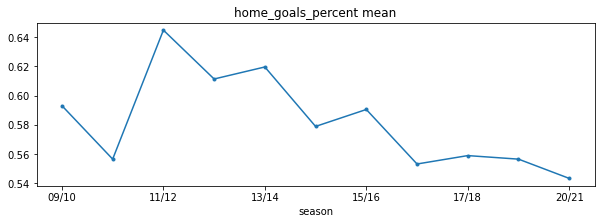

### home_goals

season
09/10    45.200000
10/11    39.428571
11/12    50.800000
12/13    51.000000
13/14    51.600000
14/15    50.200000
15/16    46.200000
16/17    45.200000
17/18    41.600000
18/19    34.333333
20/21    33.200000
Name: home_goals, dtype: float64

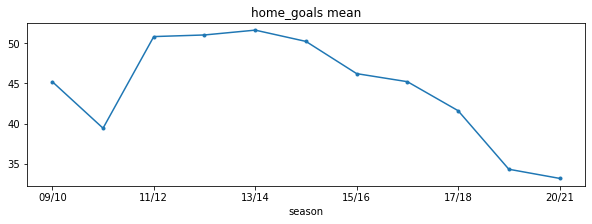

### away_goals_mean

season
09/10    1.652632
10/11    1.669173
11/12    1.547368
12/13    1.736842
13/14    1.663158
14/15    1.947368
15/16    1.642105
16/17    2.010526
17/18    1.736842
18/19    1.429825
20/21    1.602614
Name: away_goals_mean, dtype: float64

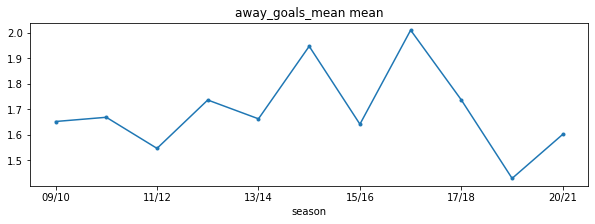

### away_goals

season
09/10    31.400000
10/11    31.714286
11/12    29.400000
12/13    33.000000
13/14    31.600000
14/15    37.000000
15/16    31.200000
16/17    38.200000
17/18    33.000000
18/19    27.166667
20/21    27.800000
Name: away_goals, dtype: float64

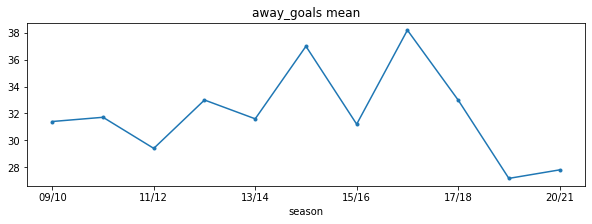

### home_goals_mean

season
09/10    2.378947
10/11    2.075188
11/12    2.673684
12/13    2.684211
13/14    2.715789
14/15    2.642105
15/16    2.431579
16/17    2.378947
17/18    2.189474
18/19    1.807018
20/21    1.884967
Name: home_goals_mean, dtype: float64

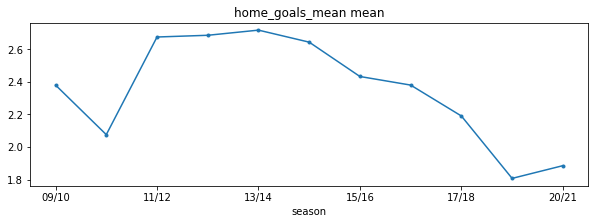

### home_goals

season
09/10    45.200000
10/11    39.428571
11/12    50.800000
12/13    51.000000
13/14    51.600000
14/15    50.200000
15/16    46.200000
16/17    45.200000
17/18    41.600000
18/19    34.333333
20/21    33.200000
Name: home_goals, dtype: float64

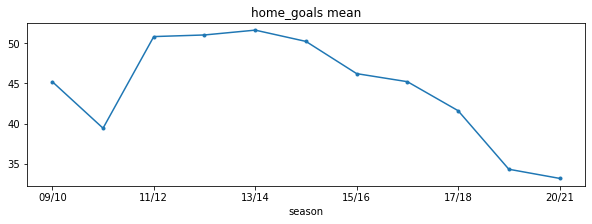

### goals

season
09/10    76.600000
10/11    71.142857
11/12    80.200000
12/13    84.000000
13/14    83.200000
14/15    87.200000
15/16    77.400000
16/17    83.400000
17/18    74.600000
18/19    61.500000
20/21    61.000000
Name: goals, dtype: float64

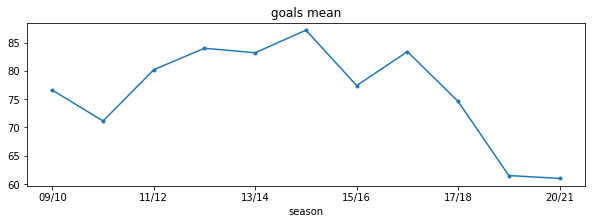

### goals_mean

season
09/10    2.015789
10/11    1.872180
11/12    2.110526
12/13    2.210526
13/14    2.189474
14/15    2.294737
15/16    2.036842
16/17    2.194737
17/18    1.963158
18/19    1.618421
20/21    1.742857
Name: goals_mean, dtype: float64

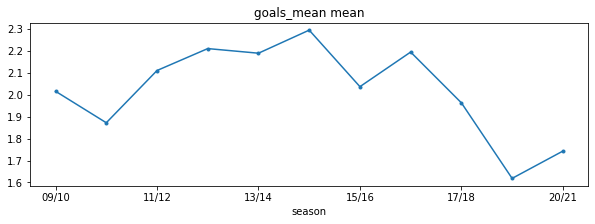

In [9]:
fields = ["away_pts_percent", "away_pts", 
          "away_goals_percent", "away_goals",
          "home_pts_percent", "home_pts", 
          "home_goals_percent", "home_goals",
          "away_goals_mean", "away_goals", 
          "home_goals_mean", "home_goals",
          "goals", "goals_mean"]

positions=[1,2,3,4,5]

plot_stat_evolution(seasons_table=all_seasons_table, 
                    stats=fields, 
                    positions=positions)